# This is a notebook for Random Forest (with Stemming), training a model to be able to categorize fake vs real news

In [70]:
import re
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

from sklearn.svm import SVC
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

Make a function to apply text preprocesing to the datasets. </br>
Load the data formating it correctly for easy use and apply the preporcessing </br>
Split the data into a label and title columns so es easy to access only the title for training

In [71]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove Numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra white space
    text = text.strip()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [72]:
# Load the datasets formating them correctly for ease of use
train_data = pd.read_csv(
    r"C:/Users/rfria/Projects/ironhacks/PROJECT_Natural_Language_Processing_Challenge/training_data_lowercase.csv",
    sep='\t',  # TAB serparator
    header=None,
    names=['label', 'title']
)

test_data = pd.read_csv(
    r"C:/Users/rfria/Projects/ironhacks/PROJECT_Natural_Language_Processing_Challenge/testing_data_lowercase_nolabels.csv",
    sep='\t',  # TAB serparator
    header=None,
    names=['label', 'title']
)

print(train_data.head())
print(test_data.head())

   label                                              title
0      0  donald trump sends out embarrassing new year‚s...
1      0  drunk bragging trump staffer started russian c...
2      0  sheriff david clarke becomes an internet joke ...
3      0  trump is so obsessed he even has obama‚s name ...
4      0  pope francis just called out donald trump duri...
  label                                              title
0     2  copycat muslim terrorist arrested with assault...
1     2  wow! chicago protester caught on camera admits...
2     2   germany's fdp look to fill schaeuble's big shoes
3     2  mi school sends welcome back packet warning ki...
4     2  u.n. seeks 'massive' aid boost amid rohingya '...


In [73]:
# Apply preprocessing to the 'title' column
# train_data['title'] = train_data['title'].apply(clean_text)
# test_data['title'] = test_data['title'].apply(clean_text)

print(train_data['title'].head())
print(test_data['title'].head())

0    donald trump sends out embarrassing new year‚s...
1    drunk bragging trump staffer started russian c...
2    sheriff david clarke becomes an internet joke ...
3    trump is so obsessed he even has obama‚s name ...
4    pope francis just called out donald trump duri...
Name: title, dtype: object
0    copycat muslim terrorist arrested with assault...
1    wow! chicago protester caught on camera admits...
2     germany's fdp look to fill schaeuble's big shoes
3    mi school sends welcome back packet warning ki...
4    u.n. seeks 'massive' aid boost amid rohingya '...
Name: title, dtype: object


Tokenice and stemming to prepare the titles to convert to numbers using TF_IDF

In [74]:
# Tokenize train and testing data
def tokenizeDataframe(text):
    tokens = word_tokenize(text)
    return tokens

# train_data['title'] = train_data['title'].apply(tokenizeDataframe)
# test_data['title'] = test_data['title'].apply(tokenizeDataframe)

print(train_data.head())
print(test_data.head())

   label                                              title
0      0  donald trump sends out embarrassing new year‚s...
1      0  drunk bragging trump staffer started russian c...
2      0  sheriff david clarke becomes an internet joke ...
3      0  trump is so obsessed he even has obama‚s name ...
4      0  pope francis just called out donald trump duri...
  label                                              title
0     2  copycat muslim terrorist arrested with assault...
1     2  wow! chicago protester caught on camera admits...
2     2   germany's fdp look to fill schaeuble's big shoes
3     2  mi school sends welcome back packet warning ki...
4     2  u.n. seeks 'massive' aid boost amid rohingya '...


In [75]:
# stemming for simplifying the words
stemmer = PorterStemmer()
# train_data['title'] = train_data['title'].apply(lambda title: [stemmer.stem(word) for word in title])
# test_data['title'] = test_data['title'].apply(lambda title: [stemmer.stem(word) for word in title])

print("Stemmed Tokens:", train_data['title'].head())
print("Stemmed Tokens:", test_data['title'].head())

Stemmed Tokens: 0    donald trump sends out embarrassing new year‚s...
1    drunk bragging trump staffer started russian c...
2    sheriff david clarke becomes an internet joke ...
3    trump is so obsessed he even has obama‚s name ...
4    pope francis just called out donald trump duri...
Name: title, dtype: object
Stemmed Tokens: 0    copycat muslim terrorist arrested with assault...
1    wow! chicago protester caught on camera admits...
2     germany's fdp look to fill schaeuble's big shoes
3    mi school sends welcome back packet warning ki...
4    u.n. seeks 'massive' aid boost amid rohingya '...
Name: title, dtype: object


Apply TF-IDF to the dataset to conver the words into numerical values for model training

In [76]:
# Join tokenized words back into strings
# train_data['title'] = train_data['title'].apply(lambda tokens: ' '.join(tokens))

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(train_data['title'])

print("\nTF-IDF Feature Names:", tfidf_vectorizer.get_feature_names_out())
print("\nTF-IDF Representation:\n", X_tfidf)


TF-IDF Feature Names: ['00' '0045' '0111' ... 'îk' 'îpence' 'øqu']

TF-IDF Representation:
 <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 390264 stored elements and shape (34152, 18673)>
  Coords	Values
  (0, 5341)	0.23594607631008147
  (0, 17168)	0.09871680270440454
  (0, 14809)	0.360810448061762
  (0, 11760)	0.2251642878332491
  (0, 5782)	0.36784073721965305
  (0, 11261)	0.21081145630832848
  (0, 18556)	0.2795008715924424
  (0, 6110)	0.41238633616840253
  (0, 10595)	0.31514400469546994
  (0, 16720)	0.22142744799533873
  (0, 9017)	0.18273121389310565
  (0, 5242)	0.3795171214730221
  (1, 17168)	0.10035834003226096
  (1, 5514)	0.4328255787960555
  (1, 2371)	0.42168063909640197
  (1, 15785)	0.3923235418466126
  (1, 15837)	0.3982062340521523
  (1, 14360)	0.26389760407113516
  (1, 3525)	0.38008086220062226
  (1, 8953)	0.3133469115315427
  (2, 14997)	0.27978598468001187
  (2, 4445)	0.30178363237263756
  (2, 3325)	0.3361754376926148
  (2, 1830)	0.3090971771169678
  (2, 985)	

In [77]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_tfidf, train_data['label'], test_size=0.2, random_state=42)

# Further split train+validation into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42) 

# Initialize the logicti regresion model
model = RandomForestClassifier(
    n_estimators=100, 
    max_depth=10,  # Limit depth
    min_samples_split=5,  # Require more samples to split
    min_samples_leaf=2,  # Require more samples in leaves
    random_state=42
)
model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = model.predict(X_val)

# Predict on test set
y_test_pred = model.predict(X_test)

# Predict on training set
y_train_pred = model.predict(X_train)

In [78]:
# Evaluate the model on training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
# Evaluate the model on validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Evaluate the model on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print("Training Classification Report:\n", train_report)
print(f"Training R²: {train_r2}")
print("\n" + "-"*50 + "\n")
print(f"Validation Accuracy: {val_accuracy}")
print("Validation Classification Report:\n", val_report)
print(f"Validation R²: {val_r2}")
print("\n" + "-"*50 + "\n")
print(f"Test Accuracy: {test_accuracy}")
print("Test Classification Report:\n", test_report)
print(f"Test R²: {test_r2}")

Training Accuracy: 0.8653977550024402
Training Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88     10533
           1       0.91      0.80      0.85      9957

    accuracy                           0.87     20490
   macro avg       0.87      0.86      0.86     20490
weighted avg       0.87      0.87      0.86     20490

Training R²: 0.46116520920333404

--------------------------------------------------

Validation Accuracy: 0.8502415458937198
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.86      3510
           1       0.91      0.77      0.83      3321

    accuracy                           0.85      6831
   macro avg       0.86      0.85      0.85      6831
weighted avg       0.86      0.85      0.85      6831

Validation R²: 0.4005072614828711

--------------------------------------------------

Test Accuracy: 0.8568291611

In [82]:
print(f"Test Accuracy: {test_accuracy}")
print("Test Classification Report:\n", test_report)
print(f"Test R²: {test_r2}")

Test Accuracy: 0.8568291611769873
Test Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87      3529
           1       0.91      0.78      0.84      3302

    accuracy                           0.86      6831
   macro avg       0.86      0.85      0.86      6831
weighted avg       0.86      0.86      0.86      6831

Test R²: 0.4266835370647877


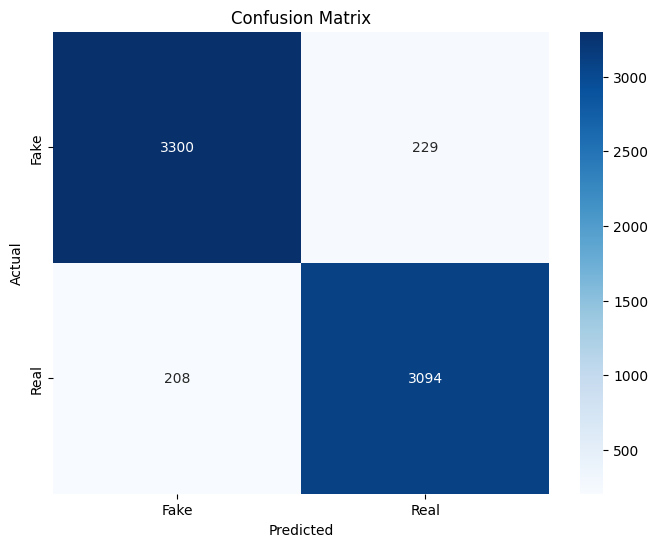

In [79]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [80]:
X_test_unlabeled = tfidf_vectorizer.transform(test_data['title'].apply(lambda tokens: ' '.join(tokens)))

# Predict labels for the unlabeled data
predicted_labels = model.predict(X_test_unlabeled)

test_data['label'] = predicted_labels

# Display the first few rows of the updated testing data
print(test_data.head())

   label                                              title
0      0  copycat muslim terrorist arrested with assault...
1      0  wow! chicago protester caught on camera admits...
2      0   germany's fdp look to fill schaeuble's big shoes
3      0  mi school sends welcome back packet warning ki...
4      0  u.n. seeks 'massive' aid boost amid rohingya '...


In [81]:
# split the label column and title column
test_data_rewrite = pd.read_csv(
    r"../testing_data_lowercase_nolabels.csv",
    sep='\t',  # TAB separator
    header=None,
    names=['label', 'title']
)

# write the new labels in place of the placeholders
test_data_rewrite['label'] = predicted_labels

# store the changes in a file
test_data_rewrite.to_csv('Stemming-RandomForest_test_data.csv', index=False)

print(test_data_rewrite.head())


FileNotFoundError: [Errno 2] No such file or directory: '../testing_data_lowercase_nolabels.csv'